<a href="https://colab.research.google.com/github/5harad/API-201-2023/blob/main/hw/hw3/hw3-answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-201 PROBLEM SET #3
**Due on Thursday, September 21, at 8:00 a.m.**

**I - INSTRUCTIONS**  
To successfully complete this problem set, please follow these steps:

1. **Create a copy of this notebook in your own drive by clicking `Copy to Drive` in the menubar (this is explained below in more detail below) - *if you do not do this your work will not be saved!*** We recommend completing this problem set in Google Chrome.
2. **Insert all your answers into your copy of the document.**
    1. Please include every portion of your submission in this document unless a separate electronic file is explicitly requested.
    3. All numerical calculations should be done in the notebook itself, using R code. If you have to do calculations by hand, include a picture of your handwritten work.
    2. To add an image of handwritten work, screenshots, or anything else, add a new text cell and click the small image icon in the menubar above the cell. After inserting an image, press the `esc` key to show the image. If you have trouble with this method, upload your image to [Freeimage.host](https://freeimage.host), copy a Markdown link, and paste it in a text cell.
3. **Once your document is complete, please save and submit the notebook on Canvas as a PDF.**
    1. Click `View > Expand sections` in the menubar to make sure all work is visible (if it is greyed out then it is already visible).
    1. Click `Runtime > Run all` in the menubar to make sure all of your code is executed.
    1. Click `File > Print` in the menubar and choose the `Save as PDF` option in Chrome to export your notebook as a PDF.
    1. Check to make sure answers do not get cut off - when you go to print the PDF we recommend clicking on `More settings` and setting `Margins` to `None`.
    1. Submit your file on Canvas.


**II - IDENTIFICATION**
1. **Your Full Name:** `     `  

2. **Group Members (classmates with whom you worked on this problem set):**  
    1. `     `
    2. `     `
    3. `     `
    4. `     `
    
3. **Compliance with HKS Academic Code**  
We abide by the Harvard Kennedy School Academic code for all aspects of the course. In terms of problem sets, unless explicitly written otherwise, the norms are the following: You are free (and encouraged) to discuss problem sets with your classmates. However, you must hand in your own unique written work and code in all cases. Any copy/paste of another’s work is plagiarism. In other words, you may work with your classmate(s), sitting side-by-side (physically or remotely!) and going through the problem set question by question, but you must each type your own answers and your own code. For more details, please see syllabus.

    **I certify that my work in this problem set complies with the HKS Academic Code**
    - [ ] Yes
    - [ ] No

---

### HINT on navigating the problem set

In Google Colab, you can click the icon of a bulleted list on the top left of the window to see a live outline for the problem set that you can navigate:


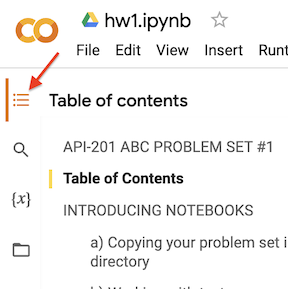
---

## Learning Objectives

- Load and inspect data in R
- Perform data wrangling using `dplyr`
- Create visualizations using `ggplot2`

## Load the `tidyverse` library

Run the cell below to get started

In [ ]:
# Load the necessary libraries
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# PART I: TELEWORK DURING THE PANDEMIC

The U.S. Bureau of Labor Statistics (BLS), through the Current Population Survey (CPS), has recently been gathering supplemental data on the effects of the coronavirus pandemic on the U.S. job market. BLS estimates that there were 134,068,000 employed persons at least 25 years old in the United States in August 2021.

Imagine that we surveyed a random sample of 10,000 of these individuals, asking them their level of educational attainment, and if they "teleworked or worked at home for pay at any time in the last 4 weeks because of the coronavirus pandemic."

Run the cell below to load a view a snippet of the hypothetical survey results.

_Note: We will use the shorthand "teleworked due to the pandemic" to mean "teleworked or worked at home for pay in the last 4 weeks because of the coronavirus pandemic." The hypothetical survey results are generated based on  BLS Table 1, August 2020, available [here](https://www.bls.gov/cps/covid19/covid19-table1-2020-08.xlsx)._



In [ ]:
# Load dataset
fname <-"https://5harad.com/datasets/API201/telework.csv"
telework_survey <- read_csv(fname)

# Preview the first few rows of the dataset
head(telework_survey, 10)

Rows: 10000 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Education
lgl (1): Teleworked

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,Teleworked
<chr>,<lgl>
"2. High school graduate, no college",FALSE
5. Advanced degree,FALSE
3. Some college or associate degree,FALSE
"2. High school graduate, no college",FALSE
"2. High school graduate, no college",FALSE
5. Advanced degree,FALSE
5. Advanced degree,TRUE
"2. High school graduate, no college",FALSE
1. Less than a high school diploma,FALSE


### Exercise 1a
Determine the number and proportion of people who teleworked for each education category. To do so, create a data frame with four columns: `Education`, `num_teleworked`, `num_did_not_telework`, and `p_teleworked`.

In [ ]:
# Your answer here!

# START
teleworked_by_edu <- telework_survey %>%
    group_by(Education) %>%
    summarize(
        num_teleworked = sum(Teleworked),
        num_did_not_telework = sum(Teleworked == FALSE),
        p_teleworked = mean(Teleworked)
    )

teleworked_by_edu
# END

Education,num_teleworked,num_did_not_telework,p_teleworked
<chr>,<int>,<int>,<dbl>
1. Less than a high school diploma,19,648,0.02848576
"2. High school graduate, no college",127,2455,0.04918668
3. Some college or associate degree,228,2231,0.09272062
4. Bachelor's degree only,610,2007,0.23309133
5. Advanced degree,481,1194,0.28716418


### Exercise 1b
Plot the proportion of people who teleworked for each education level.

Hint:  `geom_col()` is a simple way to make a bar chart, but there are several acceptable ways to do this.

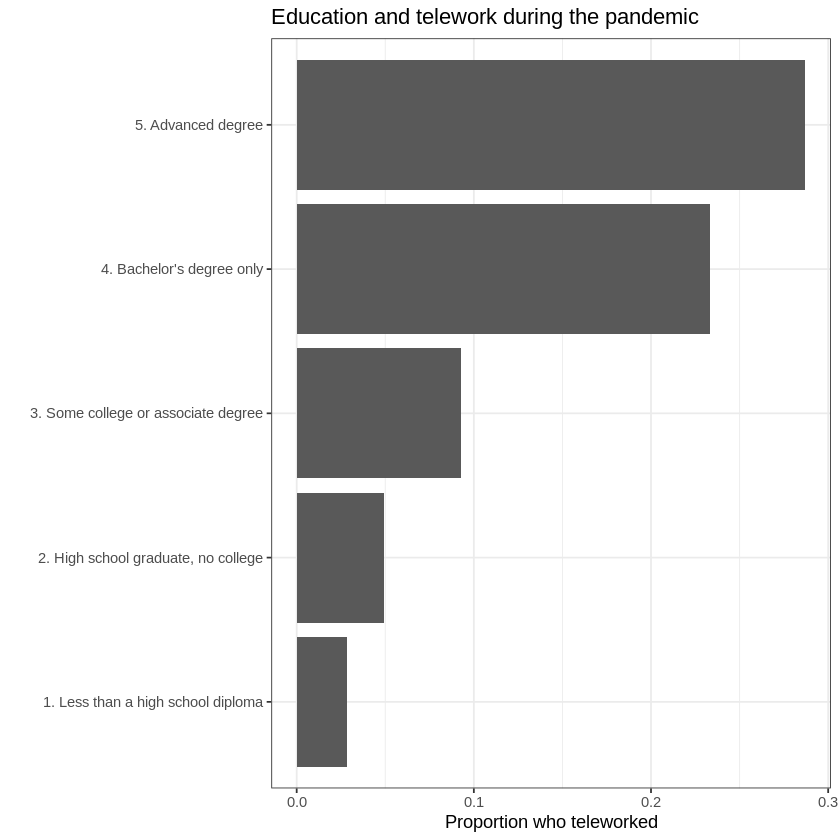

In [ ]:
# Your answer here!

# START
ggplot(teleworked_by_edu, aes(y=Education, x=p_teleworked)) +
  geom_col() +
  labs(title = "Education and telework during the pandemic",
        x = "Proportion who teleworked",
        y = ""
      ) +
  theme_bw()
# END


### Exercise 1c
What is the overall proportion of people who teleworked due to the pandemic?

In [ ]:
# Your answer here!

# START
mean(telework_survey$Teleworked)
# END

[1] 0.1465

### Exercise 1d

How does this number compare to the chart you made above? What is the overall pattern you see in terms of telecommuting and eduction? Why do you think that is?

**Your answer here!**

#### START

A greater proportion of highly edcuated workers teleworked. This is likely because they have white collar jobs that can be done vitually with a computer, and don't require being in person.

#### END

### Exercise 1e

What proportion of the 10,000 survey respondents have an advanced degree _and_ teleworked due to the pandemic?

Compute this two ways: (1) using R code, based on the original `telework_survey` dataset; and (2) by reading it directly off of the table that you generated above.

In [ ]:
# Your answer here!

# START

# 1.
telework_survey %>%
  summarize(mean(Teleworked & (Education == '5. Advanced degree')))

# 2
481 / 10000

# END

"mean(Teleworked & (Education == ""5. Advanced degree""))"
<dbl>
0.0481


[1] 0.0481

# PART II: AIR POLLUTION

The scientific literature is increasingly showing that air pollution can have large negative health and economic impacts on society. In fact, the estimated health benefits from shutting down a coal-fired powerplant are generally much larger than the climate change benefits.

In this exercise, we will fous on PM2.5 (particulate matter that is less than 2.5 micrometers in diameter), which is a good *kitchen sink* indicator of general air quality. PM2.5 has been linked to a variety of serious health conditions, including respiratory illnesses, cardiovascular disease, and premature death. By understanding the data and trends related to PM2.5, policymakers can be better equipped to protect public health. And air pollution often disproportionately affects marginalized communities, making it as much a social justice issue as an environmental one.

**Preview the Data**

Let's first load and preview the dataset.

In [ ]:
# Load dataset on county-level with demographic, economic, and pollution information
fname <-"https://5harad.com/datasets/API201/pollution.csv"
pollution <- read_csv(fname)

# Preview the first few rows of the dataset
head(pollution, 10)


Rows: 3056 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): state_name, county_name, census_division
dbl (18): fips, lon, lat, area_land_km2, population, income, income_pc, pop_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fips,state_name,county_name,lon,lat,area_land_km2,census_division,population,income,income_pc,⋯,farm_income_share,manufacturing_income_share,PM2.5_satellite,PM2.5_2010_satellite,PM2.5_epa,CO_epa,Pb_epa,NO2,O3_epa,SO2_epa
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1001,Alabama,Autauga,-86.64644,32.53224,1539.634,East South Central,56843.08,2237137833,39254.42,⋯,0.004929945,0.04732963,6.746667,10.526667,NA,NA,NA,NA,NA,NA
1003,Alabama,Baldwin,-87.74607,30.65922,4117.656,East South Central,209073.92,9227464750,43688.50,⋯,0.001528258,0.02791973,7.968889,9.760000,7.9,NA,NA,NA,0.057,NA
1005,Alabama,Barbour,-85.40510,31.87025,2292.160,East South Central,26289.67,836980083,31958.58,⋯,0.033421406,0.14620006,6.800000,10.122727,NA,NA,NA,NA,NA,NA
1007,Alabama,Bibb,-87.12715,33.01589,1612.189,East South Central,22564.83,663412583,29419.67,⋯,0.002222059,0.03501004,6.500000,10.500000,NA,NA,NA,NA,NA,NA
1009,Alabama,Blount,-86.56644,33.97736,1670.259,East South Central,58330.75,1947532833,33352.50,⋯,0.017235129,0.03290969,6.629412,10.776471,NA,NA,NA,NA,NA,NA
1011,Alabama,Bullock,-85.71726,32.10176,1613.083,East South Central,10577.83,276181917,26149.67,⋯,0.060064558,0.11547320,6.742857,10.042857,NA,NA,NA,NA,NA,NA
1013,Alabama,Butler,-86.68197,31.75167,2012.003,East South Central,19855.75,693229083,35071.42,⋯,0.027015467,0.10051293,6.404348,9.969565,NA,NA,NA,NA,NA,NA
1015,Alabama,Calhoun,-85.82791,33.77052,1569.246,East South Central,117113.50,4065116000,34729.33,⋯,0.003243919,0.09512535,6.900000,11.187500,NA,NA,NA,NA,NA,NA
1017,Alabama,Chambers,-85.39403,32.91550,1545.086,East South Central,34702.50,1098415250,31644.67,⋯,0.009523747,0.09404872,6.729412,10.664706,NA,NA,NA,NA,NA,NA


The first few columns include descriptive variables about each county, including the unique identifier "fips," as well as state name, longitude, latitude, area of land in the county, census division, population, and income measures.

The other columns contain pollution data for each county. Our main measure is PM2.5_satellite, which represents the weighted annual mean concentration in µg/m^3 for the year 2020.

We use satellite measurements because they provide better geographic coverage. For a subset of U.S. counties, the EPA tracks pollutants using on-the-ground monitors. This data, marked with the suffix "_epa," is from the year 2020 and is used to regulate air pollution under the Clean Air Act. Note that the EPA's current threshold for PM2.5 regulation is 12 µg/m^3.

About the main air pollutants:

    PM - Particulate Matter: A mixture of solid particles and liquid droplets in the air. PM10 can irritate the lungs and worsen asthma symptoms. PM2.5 can penetrate deep into the lungs and cause a variety of health problems, including heart disease, stroke, and cancer.
    CO - Carbon Monoxide: A colorless, odorless gas produced by the incomplete combustion of fuel. CO can reduce the amount of oxygen that the blood can carry, leading to headaches, dizziness, and nausea. Long-term exposure to CO can damage the heart and lungs.
    Pb - Lead: A heavy metal that can damage the brain and nervous system, especially in children. Lead can also cause learning disabilities, behavioral problems, and delayed growth.
    NO2 - Nitrogen Dioxide: A gas produced by the burning of fossil fuels. NO2 can irritate the lungs and worsen asthma symptoms. It can also contribute to the formation of smog.
    O3 - Ozone: A gas formed when pollutants from cars, power plants, and other sources react in sunlight. Ozone can irritate the lungs and worsen asthma symptoms. It can also damage plants and crops.
    SO2 - Sulfur Dioxide: A gas produced by the burning of coal and other fossil fuels. SO2 can irritate the lungs and worsen asthma symptoms. It can also contribute to the formation of acid rain.

**Data Summary**

In [ ]:
# It is often helpful to summarize the data to see the ranges of values and the number of missing observations
summary(pollution)

      fips        state_name        county_name             lon         
 Min.   : 1001   Length:3056        Length:3056        Min.   :-124.21  
 1st Qu.:19018   Class :character   Class :character   1st Qu.: -98.16  
 Median :29158   Mode  :character   Mode  :character   Median : -90.45  
 Mean   :30319                                         Mean   : -91.88  
 3rd Qu.:45020                                         3rd Qu.: -83.67  
 Max.   :56045                                         Max.   : -67.61  
                                                                        
      lat        area_land_km2      census_division      population      
 Min.   :25.59   Min.   :   58.68   Length:3056        Min.   :      69  
 1st Qu.:34.59   1st Qu.: 1125.43   Class :character   1st Qu.:   11036  
 Median :38.40   Median : 1600.81   Mode  :character   Median :   25904  
 Mean   :38.29   Mean   : 2495.29                      Mean   :  103545  
 3rd Qu.:41.76   3rd Qu.: 2382.04             

Out of the ~3000 US counties, notice there are many more missing counties in the EPA data (i.e., `PM2.5_epa`) compared to the satellite data (i.e., `PM2.5_satellite`). This is because of the relatively sparse EPA monitor network.

### Exercise 2a

Use `dplyr` to summarize the dataset. Calculate the mean population, mean satellite PM2.5 (`PM2.5_satellite`) and the mean EPA monitor PM2.5 (`PM2.5_epa`). Confirm that these results are identical to what you got using `summary(pollution)` above.

Hint: you can set `na.rm = TRUE` within `mean` (and many other functions) to remove missing values.

In [ ]:
# Your answer here!

# START
pollution %>%
  summarize(
    mean_pop = mean(population, na.rm = TRUE),
    mean_pm25_satellite = mean(PM2.5_satellite, na.rm = TRUE),
    mean_pm25_epa = mean(PM2.5_epa, na.rm = TRUE)
  )
# END


mean_pop,mean_pm25_satellite,mean_pm25_epa
<dbl>,<dbl>,<dbl>
103544.8,6.513694,8.078195


### Exercise 2b

Give two reasons why the mean of the PM2.5 satellite data may be different than the EPA ground-level monitor data. You don't need a technically correct answer, just use your intuition.

**Your answer here!**


#### START

1. As shown from `summary(pollution)`, the satellite data has much greater coverage, and thus the samples are different.

2. The location of EPA monitors may not be random--they may be in high pollution locations (i.e., near a factory).

3. Pollution at ground level (captured by monitors) may systematically differ from pollution higher in the air (captured by satellite) for atmospheric reasons.

#### End


### Exercise 2c

Use `dplyr` to find the subset of counties with annual `PM2.5_satellite` levels greater than 12 (µg/m^3), which is the EPA's current threshold for a county being out of compliance. I.e., that is when EPA thinks the pollution levels are unsafe.

Arrange these counties in descending order by their population.

In [ ]:
# Your answer here!

# START
pollution %>%
  filter(PM2.5_satellite > 12) %>%
  arrange(desc(population))
# END


fips,state_name,county_name,lon,lat,area_land_km2,census_division,population,income,income_pc,⋯,farm_income_share,manufacturing_income_share,PM2.5_satellite,PM2.5_2010_satellite,PM2.5_epa,CO_epa,Pb_epa,NO2,O3_epa,SO2_epa
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6019,California,Fresno,-119.6550,36.76101,15432.139,Pacific,975326.42,38379686833,39196.17,⋯,0.0478941248,0.042344453,15.48734,8.958228,20.3,2,NA,20,0.090,5
6099,California,Stanislaus,-121.0028,37.56232,3874.667,Pacific,536259.75,21425108417,39807.58,⋯,0.0399757003,0.080044112,12.04737,8.584211,15.5,2,NA,9,0.080,NA
6107,California,Tulare,-118.7811,36.22883,12493.841,Pacific,460619.25,17085100583,36978.00,⋯,0.0882062998,0.050059193,15.66393,9.130328,19.6,NA,NA,9,0.095,NA
6047,California,Merced,-120.7228,37.19481,5019.407,Pacific,269744.92,9673630667,35689.17,⋯,0.1011926975,0.061768819,14.30800,10.350000,15.5,NA,NA,7,0.079,NA
6007,California,Butte,-121.6032,39.66534,4238.489,Pacific,219972.08,8996057083,41001.00,⋯,0.0226323651,0.029347322,18.26250,6.741667,16.0,4,NA,5,0.074,NA
6113,California,Yolo,-121.9027,38.67961,2628.146,Pacific,210458.58,10627318417,50317.58,⋯,0.0218307815,0.044874889,12.34138,6.413793,NA,NA,NA,4,0.066,NA
6089,California,Shasta,-122.0436,40.76051,9778.552,Pacific,180240.25,7544439750,41807.50,⋯,0.0057754656,0.021753972,13.81892,5.042342,10.2,NA,NA,NA,0.069,NA
6039,California,Madera,-119.7498,37.20982,5534.592,Pacific,153735.17,5513430667,35781.67,⋯,0.1118102348,0.047500338,23.82456,8.778947,16.9,NA,NA,6,0.085,NA
6031,California,Kings,-119.8155,36.07248,3602.602,Pacific,151076.25,5095987083,33714.17,⋯,0.0932502275,0.058637408,12.88158,12.413158,19.9,NA,NA,9,0.084,NA


It seems that the list is comprised of counties in California. Why is that? Let's investigate further.

### Exercise 2d

Calculate the mean PM 2.5 levels in 2020 (`PM2.5_satellite`) for each state. Sort the states by the mean PM 2.5 levels in descending order.

In [ ]:
# Your answer here!

# START
pollution %>%
  group_by(state_name) %>%
  summarize(mean_pm25 = mean(PM2.5_satellite, na.rm = TRUE)) %>%
  arrange(desc(mean_pm25))
# END


state_name,mean_pm25
<chr>,<dbl>
California,12.298349
Oregon,8.160598
Indiana,7.774912
Illinois,7.681948
Louisiana,7.479854
Nevada,7.231548
Florida,7.197392
Ohio,7.064963
Mississippi,7.014802


### Exercise 2e

California and Oregon are generally not considered high pollution states! Any ideas as to what might be driving this? Provide your hypothesis below (no wrong answers!).

**Your answer here!**


#### START

Catastrophic West Coast fires in 2020.

#### End


**Data visualization**

To investigate this further, let's use visualization tools. One of the simplest and most powerful `ggplot2` tools is the scatter plot using `geom_point()`. Below we will use this to plot the relationship between aggregate county income (think of this like county GDP) and PM 2.5.

*Note*: In `ggplot2` you can choose an aesthetic theme for your plot. For example, adding  `+ theme_bw()` gives charts a clean look. But that is up to you!


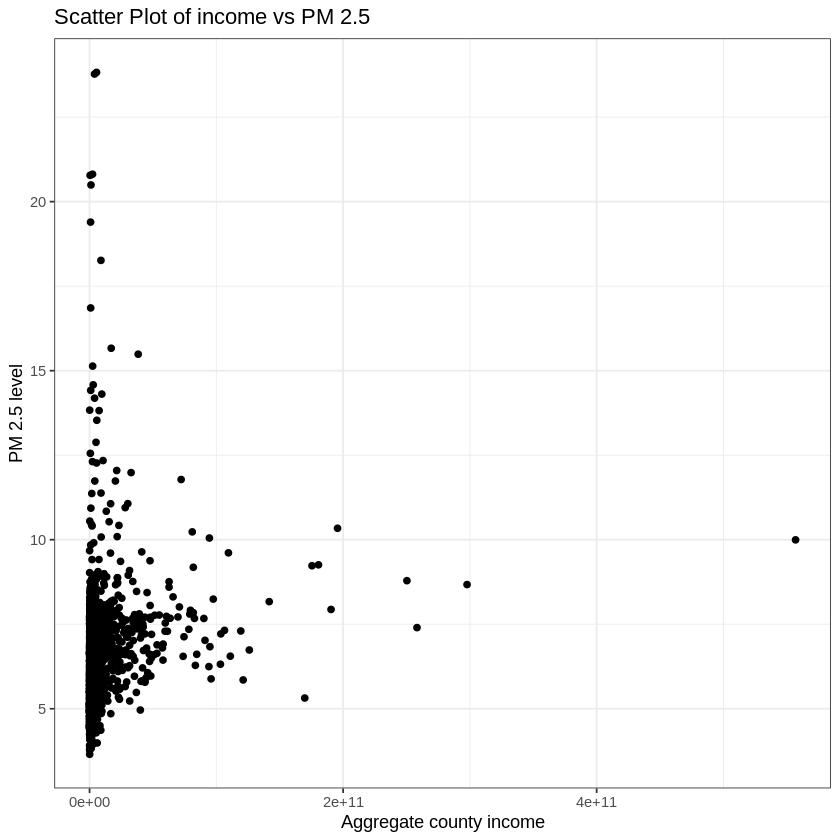

In [ ]:
ggplot(pollution, aes(x = income, y = PM2.5_satellite)) +
  geom_point() +
  labs(title = "Scatter Plot of income vs PM 2.5",
       x = "Aggregate county income",
       y = "PM 2.5 level") +
  theme_bw()

Well, that is not very easy to interpret! Partly this is becuase there is huge variation in a county's aggegate income. Los Angeles county, with 10 million people, has an income of \$557 billion---bigger than most countries. Loving, Texas, in contrast has an aggregate income of $5 million for its 69 people.  

### Exercise 2f

With skewed data, it may help to log transform the axes so that results are easier to view. Try recreating the chart above but with adding the following term:  

`+ scale_x_continuous(trans = "log10")`


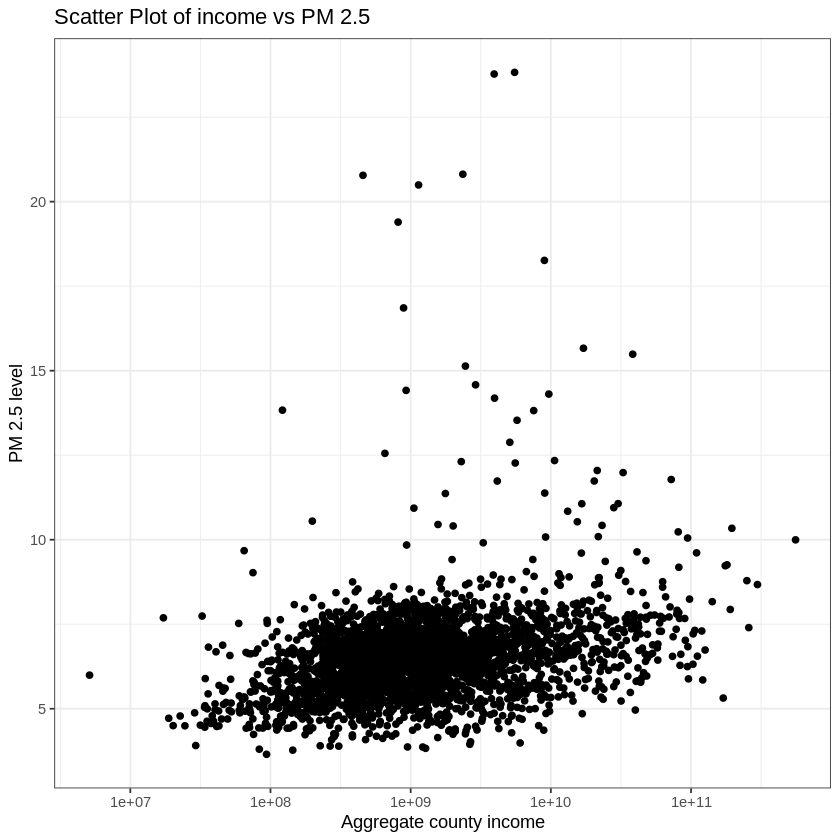

In [ ]:
# Your answer here!

# START
ggplot(pollution, aes(x = income, y = PM2.5_satellite)) +
  geom_point() +
  labs(title = "Scatter Plot of income vs PM 2.5",
       x = "Aggregate county income",
       y = "PM 2.5 level") +
  scale_x_continuous(trans = "log10") +
  theme_bw()
# END


### Exercise 2g

What does this `scale_x_continuous(trans = "log10")` do? Does it change the underlying data?

**Your answer here!**


#### START

No, it just log scales the axis, but the data remain the same.

#### End


### Exercise 2h

Do you see a pattern between aggregate income and pollution? What might by driving that pattern?

**Your answer here!**


#### START

More people and more economic production means more cars on the road and more factories---and thus more pollution.

#### End


### Exercise 2i

Now let's learn about geographic variation. Take the same chart as above and color the points by Census Division, which are broad regional categorizations of US states. This can be done by adding to the aesthetics `aes(color=census_division)`.

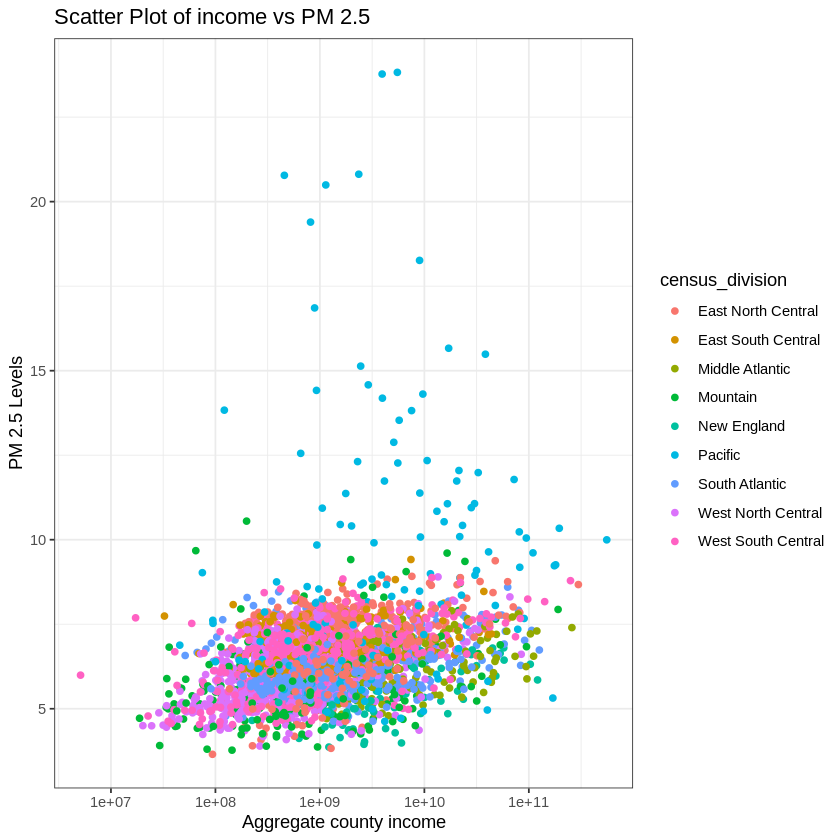

In [ ]:
# Your answer here!

# START
ggplot(pollution, aes(x = income, y = PM2.5_satellite, color = census_division)) +
  geom_point() +
  labs(title = "Scatter Plot of income vs PM 2.5",
       x = "Aggregate county income",
       y = "PM 2.5 Levels") +
  scale_x_continuous(trans = "log10") +
  theme_bw()
# END


### Exercise 2j

What Census division contains the majority of the outliers?

**Your answer here!**


#### START

Pacific--which is in line with the results we found earlier showing that California and Oregon had the highest air pollution levels.

#### End


### Exercise 2k

Now let's use a scatterplot to compare our main measure of PM 2.5 in 2020, `PM2.5_satellite`, to the level in 2010, `PM2.5_2010_satellite`. Color the points by `census_division`. Include an updated title and axis labels.

*Hint:* add a diagonal one-to-one line to compare changes between the periods: `+ geom_abline(slope=1)`


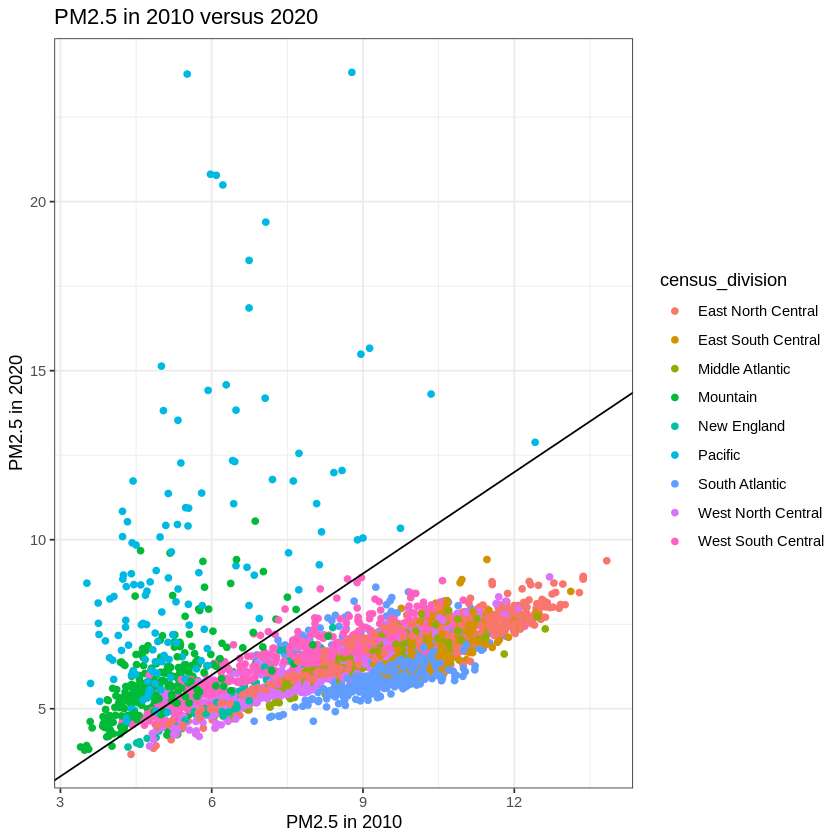

In [ ]:
# Your answer here!

# START
ggplot(pollution, aes(x = PM2.5_2010_satellite, y = PM2.5_satellite, color = census_division)) +
  geom_point() +
  labs(title = "PM2.5 in 2010 versus 2020",
       x = "PM2.5 in 2010",
       y = "PM2.5 in 2020") +
  geom_abline(slope=1) +
  theme_bw()
# END

### Exercise 2l
How do you interpret this chart?  Overally, has pollution increased or decreased between 2010 to 2020? What is the exception?

**Your answer here!**


#### START

Pollution has declined in every census division except Mountain and Pacific. For the Pacific, it was anomolously high in 2020 compared to 2010.

#### End


**Faceting**

Faceting is a very powerful tool if you want to see if patterns hold across different groupings of the data.  

First, run the following code to create a data frame, `pollution_ts`, that puts PM 2.5 in 2010 and PM 2.5 in 2020 in separate rows.   

In [ ]:
pollution_ts <- pollution %>%
  pivot_longer(c(PM2.5_satellite, PM2.5_2010_satellite), names_to = 'year', values_to = 'PM2.5') %>%
  mutate(year = if_else(year == 'PM2.5_satellite', '2020', '2010')) %>%
  select(fips, lon,	lat, census_division,	year, PM2.5)

head(pollution_ts)

fips,lon,lat,census_division,year,PM2.5
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1001,-86.64644,32.53224,East South Central,2020,6.746667
1001,-86.64644,32.53224,East South Central,2010,10.526667
1003,-87.74607,30.65922,East South Central,2020,7.968889
1003,-87.74607,30.65922,East South Central,2010,9.760000
1005,-85.40510,31.87025,East South Central,2020,6.800000
1005,-85.40510,31.87025,East South Central,2010,10.122727


### Exercise 2m

Use the new data frame `pollution_ts` and `facet_wrap` to create multiple histograms (`geom_histogram()`) of `PM2.5`, with each panel corresponding to a different `census_division`. Color the historgrams by `year` to see the difference in the distribution over time.

*Hint*: You can write `+ facet_wrap(~ some_variable)` to facet by `some_variable` (replace `some_variable` by the name of the actual variable you'd like to facet by). You can add `scales="free"` as a parameter to the `facet_wrap` command to allow each region to have its own axis ranges, which is often useful when the data across facets have different ranges.

To color the histograms by `year`, you can add `fill=year` as a parameter in `aes`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


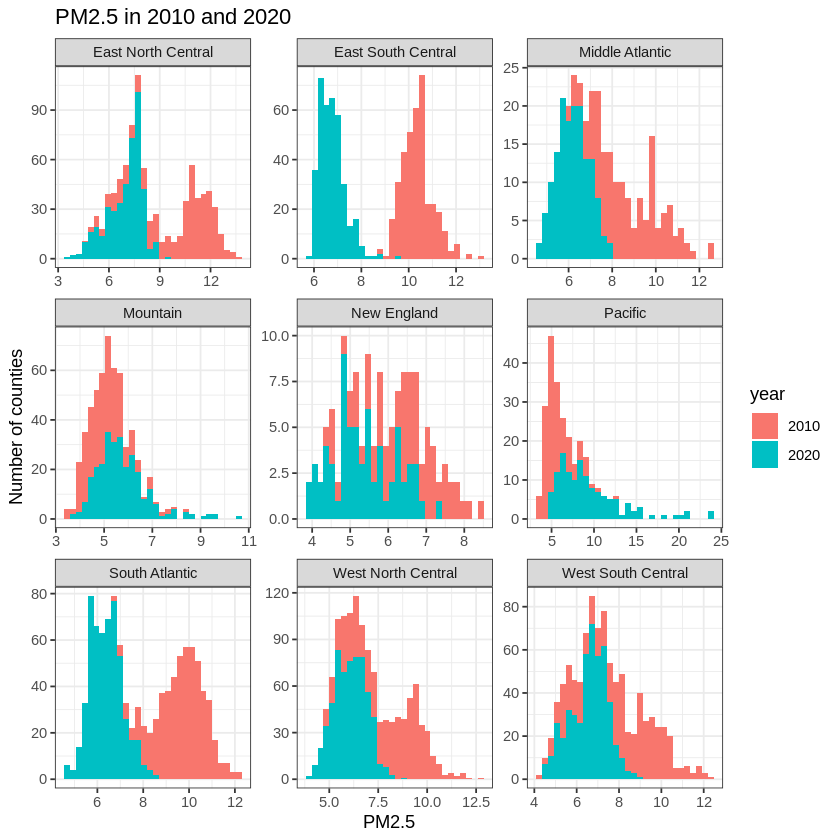

In [ ]:
# Your answer here!

# START
ggplot(pollution_ts, aes(x = PM2.5, fill=year)) +
  geom_histogram() +
  facet_wrap(~ census_division, scales="free") +
  labs(title = "PM2.5 in 2010 and 2020",
       x = "PM2.5",
       y = "Number of counties") +
  theme_bw()

# END


### Exercise 2n

How do you interpret this chart?

**Your answer here!**

#### START

Like in the scatter plot above, we see the distribution of pollution in 2020 is lower in most census regions, especially in the US Eastern and Southern regions. But in the Pacific and Mountain regions, the 2020 pollution levels are higher than in 2010.

#### End


**Mapping**

### Exercise 2o

Often it can be helpful to map the data so we can better understand spatial patterns. In this case, we can make a scatter plot of PM2.5 that approximates a geographic map of the US by using `geom_point()` with `lon` and `lat` as our coordinates for longitude and latitude. In other words, set the aesthetic as: `aes(x=`lon`, y= `lat`, color = PM2.5)`.

Use `pollution_ts` as your data frame, and add `+ facet_wrap(~year, scales="free")` to compare the map between the two years.

*Hint*: Also, you can include a nice logged color scale to accentuate the variance by adding `+ scale_color_viridis_c(trans="log10", option = "plasma")`


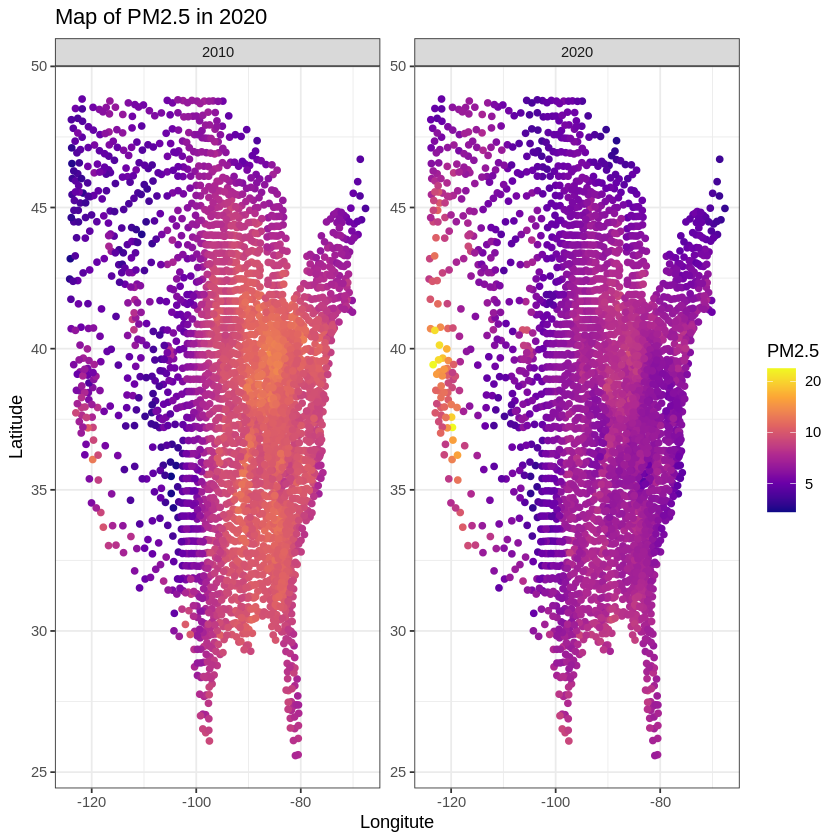

In [ ]:
# Your answer here!

# START
ggplot(pollution_ts, aes(x = lon, y = lat, color = PM2.5)) +
  geom_point() +
  facet_wrap(~year, scales="free") +
  labs(title = "Map of PM2.5 in 2020",
       x = "Longitute",
       y = "Latitude") +
  scale_color_viridis_c(trans="log10", option = "plasma") +
  theme_bw()
# END


In both years, pollution is realtively high in the "rust belt" of the US (Indiana, Ohio, etc). This is where there are a lot of industrial facilities. But to understand the spike in air pollution in 2020 in California, [click here](https://en.wikipedia.org/wiki/2020_Western_United_States_wildfire_season). This shows that air pollution is driven by both pollution from factories, as well as wildfires.   

**Global context**

Now let's compare US air pollution to what we find in the rest of the world. Below is a map of global satellite PM 2.5 in 2020.

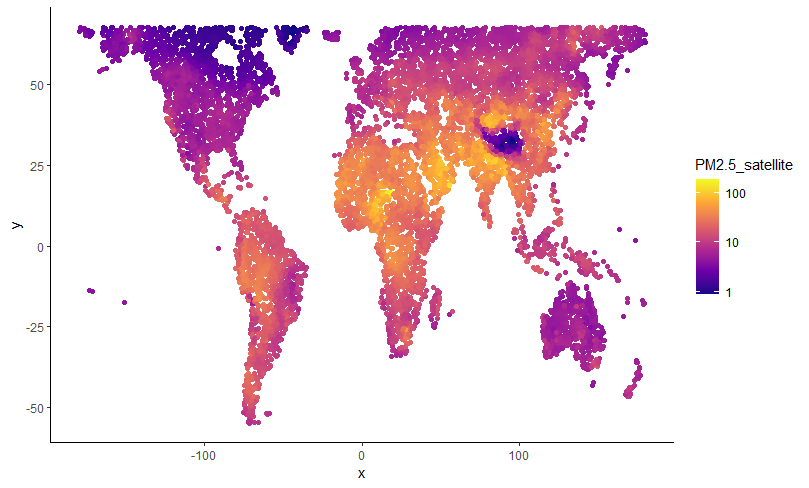

### Exercise 2p

How do US pollution levels compare to global levels? Where is pollution highest? Why do you think that is?

**Your answer here!**

#### START

PM 2.5 in the US, and even in California in 2020, is low compared to average pollution in many regions.  India, the Middle East, and Africa have high very levels. While much of that is driven by less stringent pollution regulation, a lot of air pollution comes from dust from deserts.

#### End


In case you are interested in learning about what drives pollution in desert regions, take a look at the Bodele depression in [Chad](https://en.wikipedia.org/wiki/Bod%C3%A9l%C3%A9_Depression). The lesson here is that there are many human and non-human drivers of air poillution!